<a href="https://colab.research.google.com/github/Gianolli/LOG6306-Personal-Project/blob/main/ALL_DATA_LOGISTIC_CNN_BGL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install logparser3
from google.colab import drive
drive.mount('/content/drive')

input_dir = '/content/drive/MyDrive/log6309-replication/' # The input directory of log file

output_dir = '/content/drive/MyDrive/log6309-replication/'  # The output directory of parsing results
log_file = 'BGL.log'  # The input log file name

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: regex
    Found existing installation: regex 2023.6.3
    Uninstalling regex-2023.6.3:
      Successfully uninstalled regex-2023.6.3
Mounted at /content/drive


In [ ]:
# PREPROCESS
from logparser.Drain import LogParser
log_format='<Label> <Timestamp> <Date> <Node> <Time> <NodeRepeat> <Type> <Component> <Level> <Content>'
regex = [r'core\.\d+']

st = 0.5  # Similarity threshold
depth = 4  # Depth of all leaf nodes

parser = LogParser(log_format, indir=input_dir, outdir=output_dir,  depth=depth, st=st, rex=regex)
parser.parse(log_file)


In [ ]:
# *************************** IMPORTANT****************************************
import pandas as pd
path = '/content/drive/MyDrive/log6309-replication/BGL.log_structured.csv'
df = pd.read_csv(path)
df.head(10)

,LineId,Label,Timestamp,Date,Node,Time,NodeRepeat,Type,Component,Level,Content,EventId,EventTemplate,ParameterList
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
5,6,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.131467,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
6,7,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.293532,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
7,8,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.428563,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
8,9,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.601412,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
9,10,-,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.749199,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]


In [ ]:
print(df.shape)

(4188777, 14)


In [ ]:

from pickle import TRUE
# *************************** IMPORTANT****************************************
# create Event Sequence
from datetime import datetime
from datetime import timedelta
from collections import OrderedDict

data_dict = OrderedDict()
label_dict = OrderedDict()
timestamp_list = df['Timestamp']
label_list = df['Label']
event_list=df['EventId']
i = 0
s = 1
session_id = 'Session '+ str (s)
first_time = timestamp_list[0]



#label_dict = label_data_indexed['Label'].to_dict()
#label_dict = df['Label']
#data_df = pd.DataFrame(list(data_dict.items()), columns=['SessionId', 'EventSequence'])


for x in range(4188777):
    if datetime.fromtimestamp(timestamp_list[x]) - datetime.fromtimestamp(first_time) <= timedelta(seconds= 21600) :
       if (not session_id in data_dict) and (not session_id in label_dict) : # Check id the session Id is in the list before add it
          data_dict[session_id] = []
          label_dict[session_id] = []
       data_dict[session_id].append(event_list[x])
       y=label_list[x]
       label_dict[session_id].append(0 if label_list[x] == '-' else 1)

      # data_df['Label'] = data_dict[session_id].append(label_list[x])
       #data_df['Label'] = data_df['EventSequence'].apply(lambda y: 0 if label_dict[y] == '-' else 1)
       #data_dict[event_list[x]].append(label_list[x])

    else:
      first_time = timestamp_list[x]
      s += 1
      session_id = 'Session '+ str (s)
      data_dict[session_id] = []
      data_dict[session_id].append(event_list[x])
      #data_dict[session_id].apply(lambda : 1 if label_dict[x] == 'Anomaly' else 0)

      label_dict[session_id] = []
      y=label_list[x]
      #label_dict[session_id].append(label_list[x])
      label_dict[session_id].append(0 if label_list[x] == '-' else 1)



data_df = pd.DataFrame(list(data_dict.items()), columns=['SessionId', 'EventSequence'])
data_df2 = pd.DataFrame(list(label_dict.items()), columns=['SessionId', 'label'])
print(type(data_df))
print(data_df.shape)
data_df.head(15)

print(type(data_df2))
print(data_df2.shape)
data_df2.head(15)

<class 'pandas.core.frame.DataFrame'>
(567, 2)
<class 'pandas.core.frame.DataFrame'>
(567, 2)


,SessionId,label
0,Session 1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Session 2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Session 3,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Session 4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Session 5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,Session 6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Session 7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,Session 8,"[0, 0, 0]"
8,Session 9,"[0, 0, 0]"
9,Session 10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
data_df2['label']
print(data_df2.iloc[0][1])
type(data_df2.iloc[0][1])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

list

In [ ]:
#df = pd.DataFrame({'A': ['a', 'b', 'c'],                   'B': ['x', 'y', 'z']})
#data_df2 = pd.DataFrame(list(label_dict.items()), columns=['SessionId', 'label'])
import numpy as np
a=[]
b=[]
lenght_frame2 = len(data_df2)
for i in range(lenght_frame2):
   # b = data_df2.iloc[i][1]


    if 1 in data_df2.iloc[i,1]:
       #print(data_df2.iloc[i,1])
       #data_df2['Label'] = data_df2.append(1)
       a.append(1)
    else:
       a.append(0)


data_df2['label'] = a
#print (lenght_frame2)
data_df2.head(15)

,SessionId,label
0,Session 1,0
1,Session 2,1
2,Session 3,1
3,Session 4,0
4,Session 5,1
5,Session 6,1
6,Session 7,1
7,Session 8,0
8,Session 9,0
9,Session 10,0


In [ ]:
#data_df2.to_csv('anomaly_label.csv', encoding='utf-8')

from pathlib import Path
filepath = Path('/content/drive/MyDrive/log6309-replication/anomaly_label.csv')

filepath.parent.mkdir(parents=True, exist_ok=True)
data_df2.to_csv(filepath)

In [ ]:
import pandas as pd2

data_df3 = pd2.merge(data_df,data_df2)
print(type(data_df3))
print(data_df3.shape)
data_df3.head(243)

<class 'pandas.core.frame.DataFrame'>
(567, 3)


,SessionId,EventSequence,label
0,Session 1,"[3aa50e45, 3aa50e45, 3aa50e45, 3aa50e45, 3aa50...",0
1,Session 2,"[d3e73bc3, cb2160e4, d3e73bc3, d3e73bc3, d3e73...",1
2,Session 3,"[4983ff07, 4983ff07, 150b1306, 150b1306, 150b1...",1
3,Session 4,"[9826bf22, 9826bf22, 9826bf22, d3e73bc3, d3e73...",0
4,Session 5,"[9826bf22, d3e73bc3, cb2160e4, d3e73bc3, cb216...",1
...,...,...,...
238,Session 239,"[d3e73bc3, d3e73bc3, d3e73bc3, d3e73bc3, d3e73...",1
239,Session 240,"[130bb340, 130bb340, 130bb340, 130bb340, 130bb...",1
240,Session 241,"[d3e73bc3, c39154ae, d6e5f01c, d6e5f01c, cb216...",1
241,Session 242,"[3aa50e45, cb0fd5ca, ea3efa0b, d3e73bc3, d3e73...",1


In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def _split_data(x_data, y_data, train_ratio=0.5):
    pos_idx = y_data > 0
    x_pos = x_data[pos_idx]
    y_pos = y_data[pos_idx]
    x_neg = x_data[~pos_idx]
    y_neg = y_data[~pos_idx]
    train_pos = int(train_ratio * x_pos.shape[0])
    train_neg = int(train_ratio * x_neg.shape[0])
    x_train = np.hstack([x_pos[0:train_pos], x_neg[0:train_neg]])
    y_train = np.hstack([y_pos[0:train_pos], y_neg[0:train_neg]])
    x_test = np.hstack([x_pos[train_pos:], x_neg[train_neg:]])
    y_test = np.hstack([y_pos[train_pos:], y_neg[train_neg:]])

    return (x_train, y_train), (x_test, y_test)


In [ ]:
# Shuffle the data
data_df3 = data_df3.sample(frac=1).reset_index(drop=True)
data_df3.head(5)

,SessionId,EventSequence,label
0,Session 24,"[9826bf22, ce2b6cdc, a31b789f, a111fe6f, d377c...",1
1,Session 486,"[d3e73bc3, d3e73bc3, d3e73bc3, d3e73bc3, d3e73...",1
2,Session 344,"[b36aebf8, 220716fc, 9826bf22, b291964c, 22071...",1
3,Session 469,"[9826bf22, 9826bf22, 9826bf22, 9826bf22, 9826b...",0
4,Session 205,"[cec4c1e9, cec4c1e9, cec4c1e9, cec4c1e9, cec4c...",1


In [ ]:
# Split train and test data
train_ratio = 0.8
(x_train, y_train), (x_test, y_test) = _split_data(data_df3['EventSequence'].values,
    data_df3['label'].values, train_ratio)

In [ ]:
# to test if everything is ok
num_train = x_train.shape[0]
num_test = x_test.shape[0]
num_total = num_train + num_test
num_train_pos = sum(y_train)
num_test_pos = sum(y_test)
num_pos = num_train_pos + num_test_pos

print('Total: {} instances, {} anomaly, {} normal' \
      .format(num_total, num_pos, num_total - num_pos))
print('Train: {} instances, {} anomaly, {} normal' \
      .format(num_train, num_train_pos, num_train - num_train_pos))
print('Test: {} instances, {} anomaly, {} normal\n' \
      .format(num_test, num_test_pos, num_test - num_test_pos))

#print(type(x_train))
print('====== x_train (first five lines) ======')
print(x_train[:5])

print('====== y_train (first five lines) ======')
print(y_train[:5])
y_train=y_train.astype('int')


Total: 567 instances, 311 anomaly, 256 normal
Train: 452 instances, 248 anomaly, 204 normal
Test: 115 instances, 63 anomaly, 52 normal

====== x_train (first five lines) ======
[list(['9826bf22', 'ce2b6cdc', 'a31b789f', 'a111fe6f', 'd377cbbe', '67678035', '1f5adb7d', '1f5adb7d', '63ef80a3', 'ae55fb97', 'b15df703', 'b15df703', '43ecffee', '8d23c697', '198c56f7', '86bf963f', '2ec99d49', '798f7321', '1bff92a7', 'ce2b6cdc', 'f8ef62dd', 'fe410cc8', '2ec4bdb1', 'f8ef62dd', '940724cb', 'ae9a7a4f', '06072e40', '228fcad4', '866cdd26', '5823314d', '55addd29', '55addd29', '9f7cd7e7', '3777cdd1', '3777cdd1', '045f554d', '15d914d8', '6632ef44', '7c875406', '33acc38a', '9c1ff58e', 'a7e7a8cf', 'fed466c2', '2425917d', 'f7c382bd', 'b199c78d', '220716fc', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3'])
 list(['d3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'd3e73bc3', 'cb2160e4', 'cb2160e4', 'cb2160e4', 'cb2160e4', 'cb2

In [ ]:
# TEST POUR TF IDF

"""
The interface for data preprocessing.

Authors:
    LogPAI Team

"""


import pandas as pd
import os
import numpy as np
import re
from collections import Counter
from scipy.special import expit
from itertools import compress



class FeatureExtractor(object):

    def __init__(self):
        self.idf_vec = None
        self.mean_vec = None
        self.events = None
        self.term_weighting = None
        self.normalization = None
        self.oov = None

    def fit_transform(self, X_seq, term_weighting=None, normalization=None, oov=False, min_count=1):
        """ Fit and transform the data matrix

        Arguments
        ---------
            X_seq: ndarray, log sequences matrix
            term_weighting: None or `tf-idf`
            normalization: None or `zero-mean`
            oov: bool, whether to use OOV event
            min_count: int, the minimal occurrence of events (default 0), only valid when oov=True.

        Returns
        -------
            X_new: The transformed data matrix
        """
        print('====== Transformed train data summary ======')
        self.term_weighting = term_weighting
        self.normalization = normalization
        self.oov = oov

        X_counts = []
        for i in range(X_seq.shape[0]):
            event_counts = Counter(X_seq[i])
            X_counts.append(event_counts)
        X_df = pd.DataFrame(X_counts)
        X_df = X_df.fillna(0)
        self.events = X_df.columns
        X = X_df.values
        if self.oov:
            oov_vec = np.zeros(X.shape[0])
            if min_count > 1:
                idx = np.sum(X > 0, axis=0) >= min_count
                oov_vec = np.sum(X[:, ~idx] > 0, axis=1)
                X = X[:, idx]
                self.events = np.array(X_df.columns)[idx].tolist()
            X = np.hstack([X, oov_vec.reshape(X.shape[0], 1)])

        num_instance, num_event = X.shape
        if self.term_weighting == 'tf-idf':
            df_vec = np.sum(X > 0, axis=0)
            self.idf_vec = np.log(num_instance / (df_vec + 1e-8))
            idf_matrix = X * np.tile(self.idf_vec, (num_instance, 1))
            X = idf_matrix
        if self.normalization == 'zero-mean':
            mean_vec = X.mean(axis=0)
            self.mean_vec = mean_vec.reshape(1, num_event)
            X = X - np.tile(self.mean_vec, (num_instance, 1))
        elif self.normalization == 'sigmoid':
            X[X != 0] = expit(X[X != 0])
        X_new = X

        print('Train data shape: {}-by-{}\n'.format(X_new.shape[0], X_new.shape[1]))
        return X_new

    def transform(self, X_seq):
        """ Transform the data matrix with trained parameters

        Arguments
        ---------
            X: log sequences matrix
            term_weighting: None or `tf-idf`

        Returns
        -------
            X_new: The transformed data matrix
        """
        print('====== Transformed test data summary ======')
        X_counts = []
        for i in range(X_seq.shape[0]):
            event_counts = Counter(X_seq[i])
            X_counts.append(event_counts)
        X_df = pd.DataFrame(X_counts)
        X_df = X_df.fillna(0)
        empty_events = set(self.events) - set(X_df.columns)
        for event in empty_events:
            X_df[event] = [0] * len(X_df)
        X = X_df[self.events].values
        if self.oov:
            oov_vec = np.sum(X_df[X_df.columns.difference(self.events)].values > 0, axis=1)
            X = np.hstack([X, oov_vec.reshape(X.shape[0], 1)])

        num_instance, num_event = X.shape
        if self.term_weighting == 'tf-idf':
            idf_matrix = X * np.tile(self.idf_vec, (num_instance, 1))
            X = idf_matrix
        if self.normalization == 'zero-mean':
            X = X - np.tile(self.mean_vec, (num_instance, 1))
        elif self.normalization == 'sigmoid':
            X[X != 0] = expit(X[X != 0])
        X_new = X

        print('Test data shape: {}-by-{}\n'.format(X_new.shape[0], X_new.shape[1]))

        return X_new





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [ ]:
#feature_extractor = preprocessing.FeatureExtractor()
feature_extractor = FeatureExtractor()
x_train = feature_extractor.fit_transform(x_train, term_weighting='tf-idf')
x_test = feature_extractor.transform(x_test)



In [ ]:
# LOGISTIC REGRESSION
lr_classifier = LogisticRegression(penalty='l2', C=100, tol=0.01, class_weight=None, max_iter=1000)

lr_classifier.fit(x_train, y_train)



In [ ]:
!unzip /content/deep-loglizer-main.zip

In [ ]:
# CNN

#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
sys.path.append("../")
import argparse
from torch.utils.data import DataLoader

from deeploglizer.models import CNN
from deeploglizer.common.dataloader import load_sessions, log_dataset
from deeploglizer.common.preprocess import FeatureExtractor
from deeploglizer.common.utils import seed_everything, dump_final_results, dump_params


parser = argparse.ArgumentParser()

##### Model params
parser.add_argument("--model_name", default="CNN", type=str)
parser.add_argument("--hidden_size", default=128, type=int)
parser.add_argument("--kernel_sizes", default="2 3 4", nargs="+")
parser.add_argument("--embedding_dim", default=32, type=int)

##### Dataset params
parser.add_argument("--dataset", default="HDFS", type=str)
parser.add_argument(
    "--data_dir", default="../data/processed/HDFS_100k/hdfs_1.0_tar", type=str
)
parser.add_argument("--window_size", default=10, type=int)
parser.add_argument("--stride", default=1, type=int)

##### Input params
parser.add_argument("--feature_type", default="sequentials", type=str, choices=["sequentials", "semantics"])
parser.add_argument("--label_type", default="anomaly", type=str)
parser.add_argument("--use_tfidf", action="store_true")
parser.add_argument("--pretrain_path", default=None, type=str)
parser.add_argument("--max_token_len", default=50, type=int)
parser.add_argument("--min_token_count", default=1, type=int)
# Uncomment the following to use pretrained word embeddings. The "embedding_dim" should be set as 300
# parser.add_argument(
#     "--pretrain_path", default="../data/pretrain/wiki-news-300d-1M.vec", type=str
# )

##### Training params
parser.add_argument("--epoches", default=100, type=int)
parser.add_argument("--batch_size", default=1024, type=int)
parser.add_argument("--learning_rate", default=0.01, type=float)
parser.add_argument("--patience", default=3, type=int)

##### Others
parser.add_argument("--random_seed", default=42, type=int)
parser.add_argument("--gpu", default=0, type=int)

params = vars(parser.parse_args())

model_save_path = dump_params(params)


if __name__ == "__main__":
    seed_everything(params["random_seed"])
    session_train, session_test = load_sessions(data_dir=params["data_dir"])
    ext = FeatureExtractor(**params)

    session_train = ext.fit_transform(session_train)
    session_test = ext.transform(session_test, datatype="test")

    dataset_train = log_dataset(session_train, feature_type=params["feature_type"])
    dataloader_train = DataLoader(
        dataset_train, batch_size=params["batch_size"], shuffle=True, pin_memory=True
    )

    dataset_test = log_dataset(session_test, feature_type=params["feature_type"])
    dataloader_test = DataLoader(
        dataset_test, batch_size=4096, shuffle=False, pin_memory=True
    )

    model = CNN(meta_data=ext.meta_data, model_save_path=model_save_path, **params)

    eval_results = model.fit(
        dataloader_train,
        test_loader=dataloader_test,
        epoches=params["epoches"],
        learning_rate=params["learning_rate"],
    )

    result_str = "\t".join(["{}-{:.4f}".format(k, v) for k, v in eval_results.items()])

    key_info = [
        "dataset",
        "train_anomaly_ratio",
        "feature_type",
        "label_type",
    ]

    args_str = "\t".join(
        ["{}:{}".format(k, v) for k, v in params.items() if k in key_info]
    )

    dump_final_results(params, eval_results, model)

In [ ]:
print('Test validation:')
print('====== Evaluation summary ======')
y_test_pred_dt = lr_classifier.predict(x_test)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_dt, average='binary')
print('Precision: {:.3f}, recall: {:.3f}, F1-measure: {:.3f}\n'.format(precision, recall, f1))

Text(0.5, 1.0, '2-class Precision-Recall curve')

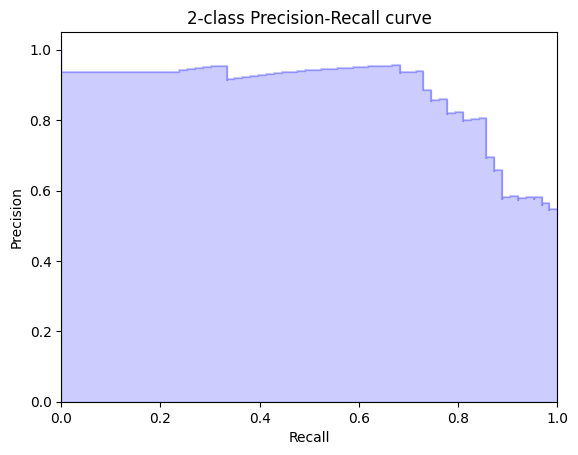

In [ ]:
y_test_pred_proba_lr = lr_classifier.predict_proba(x_test)[:,1] # predicted probabilities for being "anomaly"

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba_lr)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')

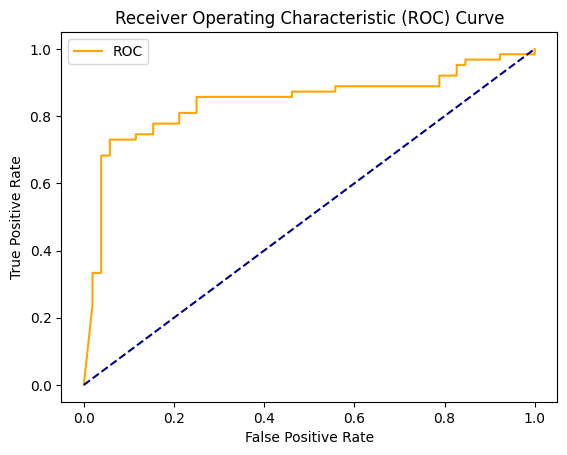

In [ ]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_lr)
plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc = roc_auc_score(y_test, y_test_pred_proba_lr)
print('AUC: %.3f\n' % roc_auc)

In [ ]:
%run /content/deep-loglizer/demo/cnn_demo.py

2023-10-20 23:12:49,123 P160 INFO {
    "model_name": "CNN",
    "hidden_size": 128,
    "kernel_sizes": "2 3 4",
    "embedding_dim": 32,
    "dataset": "HDFS",
    "data_dir": "/content/deep-loglizer/data/processed/HDFS_100k/hdfs_1.0_tar",
    "window_size": 10,
    "stride": 1,
    "feature_type": "sequentials",
    "label_type": "anomaly",
    "use_tfidf": false,
    "pretrain_path": null,
    "max_token_len": 50,
    "min_token_count": 1,
    "epoches": 100,
    "batch_size": 1024,
    "learning_rate": 0.01,
    "patience": 3,
    "random_seed": 42,
    "gpu": 0,
    "hash_id": "21f1f2fb"
}
2023-10-20 23:12:49,163 P160 INFO Load from /content/deep-loglizer/data/processed/HDFS_100k/hdfs_1.0_tar
2023-10-20 23:12:49,166 P160 INFO {
    "label_file": "../data/HDFS/anomaly_label.csv",
    "log_file": "../data/HDFS/HDFS_100k.log_structured.csv",
    "random_sessions": true,
    "test_ratio": 0.2,
    "train_anomaly_ratio": 1.0
}
2023-10-20 23:12:49,171 P160 INFO # train sessions 6352 (0

In [ ]:
!git clone https://github.com/logpai/deep-loglizer.git

Cloning into 'deep-loglizer'...
remote: Enumerating objects: 2296, done.
remote: Total 2296 (delta 0), reused 0 (delta 0), pack-reused 2296
Receiving objects: 100% (2296/2296), 86.82 MiB | 10.77 MiB/s, done.
Resolving deltas: 100% (1361/1361), done.
Updating files: 100% (42/42), done.


In [ ]:
!cd deep-loglizer

In [ ]:
!pip install -r /content/deep-loglizer-main/requirements.txt

In [ ]:
import sys

In [ ]:
sys.path.append("/content/deep-loglizer")

In [ ]:
%run /content/deep-loglizer/data_preprocess/preprocess_bgl.py


Loading BGL logs from /content/deep-loglizer/data/BGL/BGL.log_structured.csv.
Using random partition.
Total # sessions: 567
# train sessions: 213 (0.00%)
# test sessions: 113 (61.95%)
Saved to /content/deep-loglizer/data/BGL/bgl_0.0_tar


In [ ]:
%run /content/deep-loglizer/demo/cnn_demo.py

2023-10-20 23:43:40,234 P160 INFO {
    "model_name": "CNN",
    "hidden_size": 128,
    "kernel_sizes": "2 3 4",
    "embedding_dim": 32,
    "dataset": "BGL",
    "data_dir": "/content/deep-loglizer/data/BGL/bgl_0.0_tar",
    "window_size": 10,
    "stride": 1,
    "feature_type": "sequentials",
    "label_type": "anomaly",
    "use_tfidf": false,
    "pretrain_path": null,
    "max_token_len": 50,
    "min_token_count": 1,
    "epoches": 100,
    "batch_size": 1024,
    "learning_rate": 0.01,
    "patience": 3,
    "random_seed": 42,
    "gpu": 0,
    "hash_id": "9c9e5d7a"
}
2023-10-20 23:43:40,484 P160 INFO Load from /content/deep-loglizer/data/BGL/bgl_0.0_tar
2023-10-20 23:43:40,493 P160 INFO {
    "log_file": "/content/deep-loglizer/data/BGL/BGL.log_structured.csv",
    "random_sessions": true,
    "test_ratio": 0.2,
    "time_range": 21600,
    "train_anomaly_ratio": 0.0,
    "train_ratio": null
}
2023-10-20 23:43:40,496 P160 INFO # train sessions 213 (0.00 anomalies)
2023-10-20

In [ ]:
%run /content/deep-loglizer/data_preprocess/preprocess_bgl.py

Loading BGL logs from /content/deep-loglizer/data/BGL/BGL.log_structured.csv.
Using random partition.
Total # sessions: 567
# train sessions: 213 (0.00%)
# test sessions: 113 (61.95%)
Saved to /content/deep-loglizer/data/BGL/bgl_0.0_tar


In [ ]:
!unzip /content/deep-loglizer/data/processed/full_data.zip

Archive:  /content/deep-loglizer/data/processed/full_data.zip
   creating: HDFS/
   creating: HDFS/hdfs_0.0_tar/
  inflating: HDFS/hdfs_0.0_tar/session_train.pkl  
  inflating: HDFS/hdfs_0.0_tar/session_test.pkl  
  inflating: HDFS/hdfs_0.0_tar/data_desc.json  
   creating: HDFS/hdfs_1.0_tar/
  inflating: HDFS/hdfs_1.0_tar/session_train.pkl  
  inflating: HDFS/hdfs_1.0_tar/session_test.pkl  
  inflating: HDFS/hdfs_1.0_tar/data_desc.json  
   creating: BGL/
   creating: BGL/bgl_0.0_tar/
  inflating: BGL/bgl_0.0_tar/session_train.pkl  
  inflating: BGL/bgl_0.0_tar/session_test.pkl  
  inflating: BGL/bgl_0.0_tar/data_desc.json  
   creating: BGL/bgl_1.0_tar/
  inflating: BGL/bgl_1.0_tar/session_train.pkl  
  inflating: BGL/bgl_1.0_tar/session_test.pkl  
  inflating: BGL/bgl_1.0_tar/data_desc.json  
